## 第八章 假设检验练习

In [73]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
from scipy.stats import norm
from scipy.stats import t as td
from scipy.stats import chi2 as c2d
from scipy.stats import f as fd
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

## 正态分布代码  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

In [4]:
from scipy.stats import norm


# 假设检验

# 正态总体均值的假设检验

## 单个总体均值的假设检验

### z检验

#### 例1
某车间用一台包装机包装葡萄糖.袋装糖的净重是一个随机变量，它 服从正态分布.当机器正常时，其均值为0.5 kg,标准差为0. 015 kg.某日开工 后为检验包装机是否正常，随机地抽取它所包装的糖9袋，称得净重为（kg）  
$0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512 $  
问机器是否正常？

In [63]:
# 建立模型
n = symbols('n',positive=True,integer=True)
mu_0,sigma,alpha = symbols('mu_0, sigma, alpha')
x_ = Symbol('\overline x')
x_
mu_0,sigma,alpha
z = Abs((x_-mu_0)/(sigma/sqrt(n)))
z


In [9]:
# 分位点
a_1 = 1-alpha/2
a_1
a_1.subs(alpha,0.05)
# float(a_1.subs(alpha,0.05))
# type(a_1.subs(alpha,0.05).evalf())
z_a = norm.ppf(float(a_1.subs(alpha,0.05))) # 上alpha/2分位点
z_a

In [65]:
# 比较
data = np.array([0.497,0.506,0.518,0.524,0.498,0.511,0.520,0.515,0.512])
datamean = data.mean()
datamean
z.subs({x_:datamean,mu_0:0.5,n:9,sigma:0.015}).evalf(2)

#### 例2  
$设某种元件的使用寿命(单位:h)服从正态分布N(\mu,100^2)，\mu未知，按要求元件使用寿命不低于2500h才算合格。\\现从一批元件中随机抽取25件，测得其平均寿命为2484h。\\试问在显著性水平\alpha=0.1之下，这批元件是否合格？$

In [49]:
# 建立模型
n = symbols('n',positive=True,integer=True)
mu_0,sigma,alpha = symbols('mu_0, sigma, alpha')
x_ = Symbol('\overline x')
x_
mu_0,sigma,alpha
z =(x_-mu_0)/(sigma/sqrt(n))
z


In [52]:
# 分位点
a_1 = 1-alpha # 左侧检验
a_1
z_a = -norm.ppf(float(a_1.subs(alpha,0.1))) # -z_alpha
z_a

In [53]:
# 比较
z_ = z.subs({x_:2484,mu_0:2500,n:25,sigma:100}).evalf(2)
z_
z_>z_a #可以接受

True

### t检验

In [57]:
from scipy.stats import t as td

#### 例3
$改进工艺之前某厂生产的显像管的寿命X\sim N(4,\sigma^2)(单位:万小时)其中\sigma^2未知，今从改进工艺后生产的一批显像管中随机抽取9只,测得寿命如下：\\
4.33,4.12,4.05,4.34,4.41,4.52,4.16,4.05,4.37\\
若取显著性水平\alpha=0.05，问这批显像管的平均寿命是否有显著改变?$

In [70]:
# 建立模型
n = symbols('n',positive=True,integer=True)
mu_0,S,alpha = symbols('mu_0, S, alpha')
x_ = Symbol('\overline x')
x_
# mu_0,S,alpha
t =Abs((x_-mu_0)/(S/sqrt(n)))
t


In [78]:
# 分位点
n_v = 9
a_1 = 1-alpha/2 # 双侧检验
a_1

t_a = td.ppf(float(a_1.subs(alpha,0.05)),df=n_v-1) 
t_a

In [79]:
# 比较
mu_v = 4

data = np.array([4.33,4.12,4.05,4.34,4.41,4.52,4.16,4.05,4.37])
datamean = data.mean()
datamean
datastd = data.std(ddof=1)
datastd
t_ = t.subs({x_:datamean,mu_0:mu_v,n:n_v,S:datastd}).evalf(2)
t_
t_>t_a #拒绝接受

True

#### 例4
$4.	下面列出的是某工厂随机选取的20只部件的装配时间(min)：\\
9.8,10.4,10.6,9.6,9.7,9.9,10.9,11.1, 9.6,10.2,10.3,9.6,9.9,11.2,10.6,9.8,10.5,10.1,10.5,9.7\\
设装配时间的总体服从正态分布N(\mu,\sigma^2),\mu,\sigma^2均未知.是否可以认为装配时间的均值显著大于10min取(\alpha=0.05)?
$  
***
<font color=red>注意：判断是否显著大于，一般均值大于期望，采用右侧检验法，$H_0:\mu\le \mu_0=10\ H_1:\mu> \mu_0=10$，本题是判断是否采用备择假设</font>

In [80]:
# 建立模型
n = symbols('n',positive=True,integer=True)
mu_0,S,alpha = symbols('mu_0, S, alpha')
x_ = Symbol('\overline x')
x_
# mu_0,S,alpha
t =(x_-mu_0)/(S/sqrt(n))
t


In [87]:
# 分位点
n_v = 20
alpha_v = 0.05

a_1 = 1-alpha # 右侧检验
a_1

t_a = td.ppf(float(a_1.subs(alpha,alpha_v)),df=n_v-1) 
t_a

In [88]:
# 比较
mu_v = 10

data = np.array([9.8,10.4,10.6,9.6,9.7,9.9,10.9,11.1, 9.6,10.2,10.3,9.6,9.9,11.2,10.6,9.8,10.5,10.1,10.5,9.7])
datamean = data.mean()
datamean
datastd = data.std(ddof=1)
datastd
t_ = t.subs({x_:datamean,mu_0:mu_v,n:n_v,S:datastd}).evalf(4)
t_
t_>t_a #拒绝接受原假设

True

## 两个总体均值的假设检验

### z检验

#### 例5  
$某林场采用两种方案做杨树育苗试验，已知两种方案下苗高服从正态分布，标准差分别\sigma_1=20，\sigma_2=18（单位：cm）。\\方案的树苗中各抽60株做样本，测得苗高均值分别\overline x=59.34cm，\overline y=49.16cm，\\
试以95\%的可靠性，估计两种方案对杨树苗高的高度有无影响$

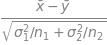

In [31]:
# 建立模型
n_1,n_2 = symbols('n_1,n_2',positive=True,integer=True)
sigma_1,sigma_2,alpha = symbols('\sigma_1,\sigma_2,alpha')
x_,y_ = symbols('\overline{x},\overline{y}')
x_,y_
sigma_1,sigma_2,alpha
z =(x_-y_)/(sqrt(sigma_1**2/n_1+sigma_2**2/n_2))
z


In [32]:
# 分位点
alpha_v = 0.05
a_1 = 1-alpha/2
a_1

z_a = norm.ppf(float(a_1.subs(alpha,alpha_v))) # 上alpha/2分位点
z_a

In [34]:
# 比较
n_1_v = 60
n_2_v = 60
sigma_1_v = 20
sigma_2_v = 18
x_v = 59.34
y_v = 49.16
z_ = z.subs({x_:x_v,y_:y_v,sigma_1:sigma_1_v,sigma_2:sigma_2_v,n_1:n_1_v,n_2:n_2_v}).evalf(2)
z_
# z_>z_a # 拒绝假设
if z_>z_a:
    print("reject")
else:
    print("accept")

reject


### t检验

#### 例6  
$某实验室分别在75^oC和80^oC的温度下对某项指标做了8次试验，测得该项指标的如下数据：\\
\begin{array}{c|c}
75^oC & 19.6,19.8,18.8,19.9,21.4,20.9,19.7,21.3\\
\hline
80^oC & 20.6,18.9,20.1,20.2,20.3,19.4,18.8,17.8\\
\end{array}\\
由经验知道，该项试验指标的数据服从正态分布，且方差相等问在显著性水平00:05下是否可以认为在两种温度下该项指标的数学期望也相等$

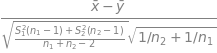

In [39]:
# 建立模型
n_1,n_2 = symbols('n_1,n_2',positive=True,integer=True)
sigma_1,sigma_2, S2_1, S2_2, alpha = symbols('\sigma_1,\sigma_2, S_1^2, S_2^2, alpha')
x_,y_ = symbols('\overline{x},\overline{y}')
x_,y_
sigma_1,sigma_2,alpha,S_1_2, S_2_2
S_w = sqrt(((n_1-1)*S2_1+(n_2-1)*S2_2)/(n_1+n_2-2))
t =(x_-y_)/(S_w*sqrt(1/n_1+1/n_2))
t


In [40]:
# 分位点
n_1_v, n_2_v = 8, 8
alpha_v = 0.05
a_1 = 1 - alpha / 2
a_1

t_a = td.ppf(float(a_1.subs(alpha, alpha_v)), df=(n_1_v + n_2_v - 2))  # 上alpha/2分位点
t_a

In [41]:
# 比较

data_x = np.array([19.6,19.8,18.8,19.9,21.4,20.9,19.7,21.3])
data_y = np.array([20.6,18.9,20.1,20.2,20.3,19.4,18.8,17.8])
x_v = np.mean(data_x)
y_v = np.mean(data_y)
# 不计算标准差，直接计算方差
S2_1_v = np.var(data_x,ddof=1)
S2_2_v = np.var(data_y,ddof=1)
x_v,y_v,S2_1_v,S2_2_v
np.var(data_x)
t_ = t.subs({x_:x_v,y_:y_v,S2_1:S2_1_v,S2_2:S2_2_v,n_1:n_1_v,n_2:n_2_v}).evalf(3)
t_
# t_>t_a #接受
if t_>t_a:
    print("reject")
else:
    print("accept")

accept


#### 例7  
$为了比较磷肥对玉米产量的影响，某作物试验区把18块条件相同的土地分为甲、乙两组，甲组土地施磷肥，一组土地不施磷肥。\\
玉米收割后统计两组土地的亩产量(单位：10kg)。\\
甲组：55,64,62,63,59,62,61,56,59\\
乙组：51,60,55,54,55,52,61,50,52\\
设两组土地的玉米亩产量都符合方差相同的正态分布，问在显著性水平\alpha=0.1之下，施用磷肥是否有利于玉米产量的显著增加？$

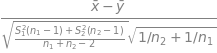

In [50]:
# 建立模型
n_1,n_2 = symbols('n_1,n_2',positive=True,integer=True)
sigma_1,sigma_2, S2_1, S2_2, alpha = symbols('\sigma_1,\sigma_2, S_1^2, S_2^2, alpha')
x_,y_ = symbols('\overline{x},\overline{y}')
x_,y_
sigma_1,sigma_2,alpha,S_1_2, S_2_2
S_w = sqrt(((n_1-1)*S2_1+(n_2-1)*S2_2)/(n_1+n_2-2))
t =(x_-y_)/(S_w*sqrt(1/n_1+1/n_2))
t


In [51]:
# 分位点
n_1_v, n_2_v = 9, 9
alpha_v = 0.1

a_1 = 1 - alpha

t_a = td.ppf(float(a_1.subs(alpha, alpha_v)), df=(n_1_v + n_2_v - 2))  # 上alpha/2分位点
t_a # 1.3367571673273142

In [53]:
# 比较
n_1_v, n_2_v = 9, 9
data_x = np.array([55,64,62,63,59,62,61,56,59])
data_y = np.array([51,60,55,54,55,52,61,50,52])
x_v = np.mean(data_x)
y_v = np.mean(data_y)
# 不计算标准差，直接计算方差
S2_1_v = np.var(data_x,ddof=1)
S2_2_v = np.var(data_y,ddof=1)
x_v,y_v,S2_1_v,S2_2_v

t_ = t.subs({x_:x_v,y_:y_v,S2_1:S2_1_v,S2_2:S2_2_v,n_1:n_1_v,n_2:n_2_v}).evalf(3)
t_
# t_>t_a #接受
if t_>t_a:
    print("reject")
else:
    print("accept")

reject


# 正态总体方差的假设检验

## 单个总体方差的假设检验

### 例1
$某厂生产的某种型号的电池，其寿命（以h计）长期以来服从方差\sigma^2=5 000的正态分布。\\
现有一批这种电池，从它的生产情况来看，寿命的波动性 有所改变。\\
现随机取26只电池，测出其寿命的样本方差\sigma^2=9200。\\
问根据这一数据能否推断这批电池的寿命的波动性较以往的有显著的变化（取\alpha=0.02）?$

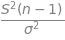

In [45]:
# 建立模型
n = symbols('n',positive=True,integer=True)
sigma2, S2, alpha = symbols('\sigma^2, S^2, alpha')
# x_,y_ = symbols('\overline{x},\overline{y}')
# x_,y_,sigma2, S2

chi2 =(n-1)*S2/sigma2
chi2


In [56]:
# 分位点
n_v = 26
alpha_v = 0.02

a_1 = 1 - alpha / 2
a_2 = alpha / 2

chi2_a_1 = c2d.ppf(float(a_1.subs(alpha, alpha_v)), df=n_v - 1)
chi2_a_2 = c2d.ppf(float(a_2.subs(alpha, alpha_v)), df=n_v - 1)
chi2_a_1
chi2_a_2

In [58]:
# 比较
n_v = 26
S2_v = 9200
sigma2_v = 5000
chi2_ = chi2.subs({n:n_v,S2:S2_v,sigma2:sigma2_v}).evalf(3)
chi2_

if chi2_>=chi2_a_1 or chi2_<=chi2_a_2:
    print("reject")
else:
    print("accept")

reject


#### 例2  
$包装机包装食盐设每袋食盐的净重服从正态分布，按规定每袋食盐净重为500克，标准差不超过10克。\\
某日开工后随机抽取9袋食盐测，得净重(单位：克)为\\
497,507,510,475,515,484,488,524,491\\
问在显著性水平\alpha=0.05下，该日包装的食盐净重的标准差是否正常$

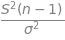

In [59]:
# 建立模型
n = symbols('n',positive=True,integer=True)
sigma2, S2, alpha = symbols('\sigma^2, S^2, alpha')
x_,y_ = symbols('\overline{x},\overline{y}')
x_,y_,sigma2, S2

chi2 =(n-1)*S2/sigma2
chi2


In [71]:
# 分位点
n_v = 9
alpha_v = 0.05

a_1 = 1 - alpha # 上alpha分位点

chi2_a = c2d.ppf(float(a_1.subs(alpha, alpha_v)), df=(n_v - 1))
chi2_a


In [72]:
# 代入比较
n_v = 9
sigma2_v = 10**2

data=np.array([497,507,510,475,515,484,488,524,491])
S2_v = np.var(data,ddof=1)
S2_v
chi2_ = chi2.subs({n:n_v,S2:S2_v,sigma2:sigma2_v}).evalf(3)
chi2_

if chi2_>=chi2_a:
    print("reject")
else:
    print("accept")

reject


## 两个总体方差的假设检验

#### 例3  
$为了比较磷肥对玉米产量的影响，某作物试验区把18块条件相同的土地分为甲、乙两组，甲组土地施磷肥，一组土地不施磷肥。\\
玉米收割后统计两组土地的亩产量(单位：10kg)。\\
甲组：55,64,62,63,59,62,61,56,59\\
乙组：51,60,55,54,55,52,61,50,52\\
设两组土地的玉米亩产量都符合方差相同的正态分布，问在显著性水平\alpha=0.05下，甲乙两组玉米亩产量的方差是否相同？$

In [74]:
# 建立模型
# n_1,n_2 = symbols('n_1,n_2',positive=True,integer=True)
sigma_1,sigma_2, S2_1, S2_2, alpha = symbols('\sigma_1,\sigma_2, S_1^2, S_2^2, alpha')
sigma_1,sigma_2,alpha,S_1_2, S_2_2
F = S2_1/S2_2


In [81]:
# 分位点
n_1_v, n_2_v = 9, 9
alpha_v = 0.05

a_1 = 1 - alpha/2 # 上alpha/2分位点
a_2 = alpha/2
F_a_1 = fd.ppf(float(a_1.subs(alpha, alpha_v)),dfn=n_1_v-1,dfd = n_2_v-1)  # 上alpha/2分位点
F_a_1 
F_a_2 = fd.ppf(float(a_2.subs(alpha, alpha_v)), dfn=n_1_v-1,dfd = n_2_v-1)  # 上alpha/2分位点
F_a_2 

In [82]:
# 比较
n_1_v, n_2_v = 9, 9
data_x = np.array([55,64,62,63,59,62,61,56,59])
data_y = np.array([51,60,55,54,55,52,61,50,52])
# x_v = np.mean(data_x)
# y_v = np.mean(data_y)
# 不计算标准差，直接计算方差
S2_1_v = np.var(data_x,ddof=1)
S2_2_v = np.var(data_y,ddof=1)
# x_v,y_v,S2_1_v,S2_2_v

F_ = F.subs({S2_1:S2_1_v,S2_2:S2_2_v}).evalf(3)
F_

if F_>F_a_1 or F_ < F_a_2:
    print("reject")
else:
    print("accept")

accept


#### 例4
$有两台机器生产金属部件。分别在两台机器所生产的部件中各取一容量n_1=60，n_2 =40的样本，\\
测得部件重量（以kg计）的样本方差分别为s_1^2= 15.46,s_2^2=9.66。\\
设两样本相互独立，两总体分别服从正态分布N(\mu_1,\sigma_1^2),N(\mu_2,\sigma_2^2)，\mu_1,\sigma_1^2,\mu_2,\sigma_2^2均未知。\\
试在显著性水平\alpha =0.05下检验假设\\
H_0:\sigma_1^2\le \sigma_2^2,\ H_1:\sigma_1^2>\sigma_2^2$

In [88]:
# 建立模型
# n_1,n_2 = symbols('n_1,n_2',positive=True,integer=True)
sigma_1,sigma_2, S2_1, S2_2, alpha = symbols('sigma_1,\sigma_2, S_1^2, S_2^2, alpha')
sigma_1,sigma_2,alpha,S_1_2, S_2_2
F = S2_1/S2_2


In [84]:
# 分位点
n_1_v, n_2_v = 60, 40
alpha_v = 0.05

a_1 = 1 - alpha # 上alpha分位点

F_a = fd.ppf(float(a_1.subs(alpha, alpha_v)),dfn=n_1_v-1,dfd = n_2_v-1)  # 上alpha/2分位点
F_a 
 

In [87]:
# 比较
n_1_v, n_2_v = 60, 40
S2_1_v = 15.64
S2_2_v = 9.66


F_ = F.subs({S2_1:S2_1_v,S2_2:S2_2_v}).evalf(3)
F_

if F_>F_a:
    print("reject")
else:
    print("accept")


accept
